In [1]:
from osgeo import gdal

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import rasterio
import numpy as np
import xarray as xr
import rioxarray

In [4]:
from osgeo import gdal

# Open raster
dataset = gdal.Open("Droneimage2.tif")
print("Raster size:", dataset.RasterXSize, dataset.RasterYSize)
print("Projection:", dataset.GetProjection())

# Read as NumPy array
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()
print("Min:", array.min(), "Max:", array.max())

Raster size: 4984 3804
Projection: LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


Warning 1: PROJ: proj_create_from_database: Cannot find proj.db
Warning 1: The definition of projected CRS EPSG:3857 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.


Min: 0 Max: 255


Original Cities GeoDataFrame:
       city country           geometry
0  New York     USA   POINT (-74 40.7)
1    London      UK  POINT (-0.1 51.5)

Joined GeoDataFrame:
       city country          geometry  index_right
0  New York     USA  POINT (-74 40.7)            0


<Figure size 1000x600 with 0 Axes>

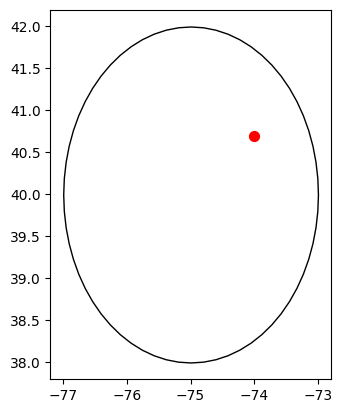

In [5]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
# Create a GeoDataFrame with some points
data = {'city': ['New York', 'London'], 'country': ['USA', 'UK']}
geometry = [Point(-74.0, 40.7), Point(-0.1, 51.5)]
cities_gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Create a simple GeoDataFrame for a country polygon
country_poly = gpd.GeoSeries([Point(-75.0, 40.0).buffer(2)], crs="EPSG:4326")
country_gdf = gpd.GeoDataFrame(geometry=country_poly)

# Perform a spatial join to find which city is in the country polygon
joined_gdf = gpd.sjoin(cities_gdf, country_gdf, how="inner", predicate="within")

print("Original Cities GeoDataFrame:")
print(cities_gdf)
print("\nJoined GeoDataFrame:")
print(joined_gdf)

# To visualize the data (requires matplotlib)
plt.figure(figsize=(10, 6))
base = country_gdf.plot(color='white', edgecolor='black')
joined_gdf.plot(ax=base, marker='o', color='red', markersize=50)
plt.show()

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1024, 'height': 1024, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'), 'transform': Affine(0.29855802128501413, 0.0, -8249945.852108238,
       0.0, -0.2986307024964255, 4967221.773528501)}


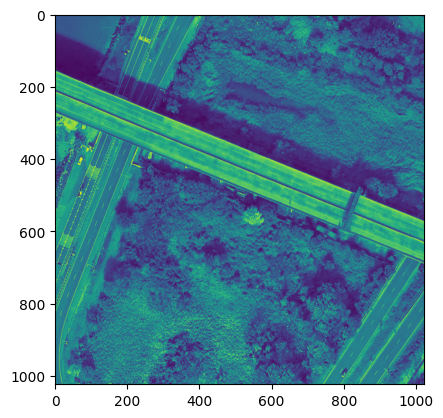

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4984, 'height': 3804, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'), 'transform': Affine(0.5036302118371189, 0.0, -8052410.131680521,
       0.0, -0.5036302118370707, 2101683.5343313776)}


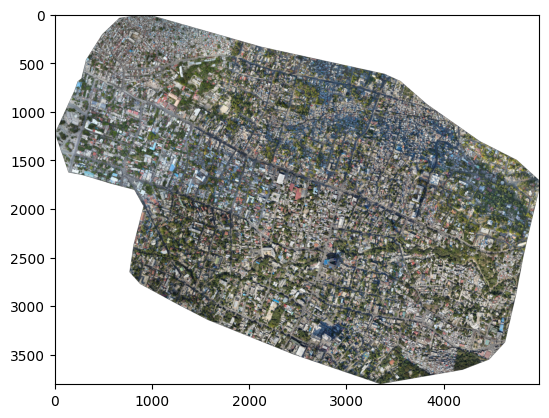

In [7]:
# RasterIO example
import rasterio
from rasterio.plot import show
with rasterio.open("Patch 8.tif") as src:
    print(src.meta)
    band1 = src.read(1)  # Read first band
    show(band1)  # Quick plot
    
    
# RasterIO example
with rasterio.open("Droneimage2.tif") as src:
    print(src.meta)
    band2 = src.read()  # Read first band
    show(band2)  # Quick plot

In [8]:
mean_val = np.mean(band1)
print("Mean pixel value:", mean_val)

Mean pixel value: 94.01898288726807


In [10]:
from osgeo import gdal

# Open raster
dataset = gdal.Open("Patch 8.tif")
print("Raster size:", dataset.RasterXSize, dataset.RasterYSize)
print("Projection:", dataset.GetProjection())

# Read as NumPy array
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()
print("Min:", array.min(), "Max:", array.max())

Raster size: 1024 1024
Projection: LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


Warning 1: PROJ: proj_create_from_database: Cannot find proj.db
Warning 1: The definition of projected CRS EPSG:3857 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.


Min: 0 Max: 255


In [11]:
import geopandas as gpd
from shapely.geometry import Point
import rasterio
import numpy as np
import xarray as xr
import rioxarray

# --- geopandas: Working with Vector Data ---
# GeoPandas is built on Pandas and extends it to handle geospatial data.
# It is used for points, lines, and polygons (vector data).
print("--- GeoPandas: Creating and Joining Vector Data ---")

--- GeoPandas: Creating and Joining Vector Data ---


In [12]:
# 1. Create a simple GeoDataFrame of city points
# The 'geometry' column is what makes it a GeoDataFrame.
# The 'crs' (Coordinate Reference System) is essential for correct spatial operations.
data = {'city': ['New York', 'London'], 'country': ['USA', 'UK']}
geometry = [Point(-74.0, 40.7), Point(-0.1, 51.5)]
cities_gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")
print("Original Cities GeoDataFrame:")
print(cities_gdf)

Original Cities GeoDataFrame:
       city country           geometry
0  New York     USA   POINT (-74 40.7)
1    London      UK  POINT (-0.1 51.5)


In [13]:
# 2. Create a polygon to represent a "region of interest"
# We'll use a buffer around a point to create a simple circle.
region_poly = gpd.GeoSeries([Point(-75.0, 40.0).buffer(2)], crs="EPSG:4326")
region_gdf = gpd.GeoDataFrame(geometry=region_poly)

In [14]:
# 3. Perform a spatial join (sjoin) to find which cities are within the region
# 'inner' join keeps only the cities that fall within the polygon.
# 'predicate="within"' specifies the spatial relationship to test.
joined_gdf = gpd.sjoin(cities_gdf, region_gdf, how="inner", predicate="within")
print("\nCities GeoDataFrame after spatial join (only cities within the region):")
print(joined_gdf)
print("-" * 50)

# --- rasterio: Reading and Writing Raster Data ---
# Rasterio is the go-to library for reading and writing raster files like GeoTIFFs.
print("--- Rasterio: Manipulating Raster Files ---")


Cities GeoDataFrame after spatial join (only cities within the region):
       city country          geometry  index_right
0  New York     USA  POINT (-74 40.7)            0
--------------------------------------------------
--- Rasterio: Manipulating Raster Files ---


In [19]:
# 1. Create a dummy raster file for demonstration purposes
# This part is just to ensure the rest of the code is runnable without a pre-existing file.
# In a real-world scenario, you would open an existing file.
with rasterio.open(
    'example_raster.tif',
    'w',
    driver='GTiff',
    height=10,
    width=10,
    count=1,
    dtype=rasterio.uint8,
    crs='EPSG:4326',
    transform=rasterio.transform.from_origin(-100, 40, 1, 1)
) as dst:
    # Write some simple data (a grid of 1s) to the file.
    dst.write(np.full((10, 10), 1, dtype=rasterio.uint8), 1)
print("Created a dummy raster file: 'example_raster.tif'")

# 2. Open the raster file and inspect its properties
# The 'with' statement ensures the file is properly closed after use.
with rasterio.open('example_raster.tif') as src:
    print(f"\nRaster dimensions: {src.width}x{src.height}")
    print(f"Number of bands: {src.count}")
    print(f"Coordinate Reference System (CRS): {src.crs}")

    # Read the data from the first band into a NumPy array
    band1_data = src.read(1)
    print(f"Data from band 1 (NumPy array):\n{band1_data}")

    # Read the full metadata profile
    profile = src.profile
    print("\nFull Raster Profile:")
    print(profile)
print("-" * 50)

# --- xarray and rioxarray: Handling Data Cubes and Reprojection ---
# Xarray is perfect for multi-dimensional data (like time-series of EO images).
# Rioxarray adds geospatial functionalities (like CRS and reprojection) to xarray objects.
print("--- Xarray & Rioxarray: Working with Data Cubes ---")

# 1. Create a multi-dimensional xarray DataArray
# This simulates a small data cube with time, latitude, and longitude dimensions.
# The 'dims' and 'coords' parameters are essential for creating a labeled array.
time_steps = [np.datetime64('2023-01-01'), np.datetime64('2023-01-08')]
latitudes = np.arange(40, 43)
longitudes = np.arange(-110, -107)

data_cube = xr.DataArray(
    np.random.rand(2, 3, 3),
    coords=[('time', time_steps), ('lat', latitudes), ('lon', longitudes)],
    name='temperature',
    attrs={'units': 'Celcius'}
)
print("Original xarray DataArray (simulated data cube):")
print(data_cube)

# 2. Add geospatial information using rioxarray
# The .rio accessor is the key to rioxarray's functionality.
# write_crs() adds the CRS, making the DataArray a true geospatial object.
data_cube.rio.write_crs("EPSG:4326", inplace=True)
print(f"\nCRS added by rioxarray: {data_cube.rio.crs}")

# # 3. Perform a reprojection
# # We can easily reproject the entire data cube to a new CRS.
# reprojected_data_cube = data_cube.rio.reproject("EPSG:3857")
# print(f"\nCRS after reprojection to EPSG:3857 (Web Mercator): {reprojected_data_cube.rio.crs}")

# # 4. Save the DataArray to a GeoTIFF
# # Rioxarray handles writing the multi-dimensional data to a raster format.
# reprojected_data_cube.rio.to_raster("reprojected_data_cube.tif")
# print("\nSaved the reprojected data cube to 'reprojected_data_cube.tif'")


Created a dummy raster file: 'example_raster.tif'

Raster dimensions: 10x10
Number of bands: 1
Coordinate Reference System (CRS): EPSG:4326
Data from band 1 (NumPy array):
[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]

Full Raster Profile:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 10, 'height': 10, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(1.0, 0.0, -100.0,
       0.0, -1.0, 40.0), 'blockxsize': 10, 'blockysize': 10, 'tiled': False, 'interleave': 'band'}
------------------

In [8]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame({
    "Name": ["A", "B", "C"],
    "Value": [10, 20, 30]
})

print(df)
print(df.describe())  # Summary stats

# Filter
filtered = df[df["Value"] > 15]
print(filtered)

# Save to CSV
df.to_csv("output.csv", index=False)

  Name  Value
0    A     10
1    B     20
2    C     30
       Value
count    3.0
mean    20.0
std     10.0
min     10.0
25%     15.0
50%     20.0
75%     25.0
max     30.0
  Name  Value
1    B     20
2    C     30
